**Analisis y procesamiento de los datos de espectro recolectados**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.constants import h, c, k
import scipy.signal


#Funcion para lectura de los espectros 
def open_espec(route, mode = 'r'):
    """
    route : ruta del archivo del espectro type(string)
    mode : predefinido read (r)
    """
    arc = open(route, mode)
    l = arc.readlines()
    espec = []
    for i in np.arange(len(l)):
        t = np.fromstring(l[i], dtype = int, sep = " ")
        espec.append(t)
    
    return espec

#Funcion para el descarte de datos saturados y anomalos

def clean(esp, tol):
    """
    Eliminación de los espectros saturados y al inicio de la medición
    tol : entre 100 y 200
    """
    ESP = []
 
    for i in range(len(esp)-1):
        if abs(max(esp[i])-max(esp[i+1])) <= tol:
            ESP.append(esp[i])
    
    return np.array(ESP)

vect_clean = np.vectorize(clean)

def mean_esp(ESP):

    E = []
    for i in range(len(ESP)):
        M = sum(ESP[i])/len(ESP[i])
        E.append(M)
    
    return E
    
def lowpass(ESP, A=1, B=0.5):
    b, a = scipy.signal.butter(A, B,'lowpass')  
    
    return scipy.signal.filtfilt(b, a, ESP)

        

c:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [295]:
#Cargue de Archivos

#MUUA
data = np.array([np.array([open_espec('esp_data\esp_X31_23_05_2023__12_14_00_bosqueplaza.txt', 'r')], dtype = 'object')[0],
              np.array([open_espec('esp_data\esp_X53__23_05_2023__14_59_15_picacho.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X50__24_05_2023__13_34_35_muua.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X77__31_05_2023__12_26_56_muua2.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X75__02_06_2023__14_23_06_barrientos.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X65__04_06_2023__15_04_17_casa1.txt', 'r')], dtype = 'object')[0],
                np.array([open_espec('esp_data\esp_X62__06_06_2023__14_32_55_barrientoss1.txt', 'r')], dtype = 'object')[0],
                ])

names = ['23_05_a', '23_05_b', '24_05', '31_05', '02_06', '04_06', '06_06']

#Extraterrestrial_Solar_Spectrum
solar_ref_ext = pd.read_excel('WMO_Wehrli_ref_solar_spectra_AM0.xls', header=0)
solar_ref_ext.columns = ['wv', 'extrater']

#Surface_Solar_Spectrum
solar_ref_sfc = pd.read_excel('ASTM G173-03_Ref_Solar_spectra_AM1.5.xls', header = 0)
solar_ref_sfc.columns = ['wv', 'etr', 'global', 'circumsolar']

#Wavelenght for Espectral_data
#N = 288
#wv = np.arange(N)*2.3548+321.47

def p(x):
  #Calibration Constants p(x) = a0+b1x+b2x^2+b3x^3+b4x^4+b5x^5
  #Para Hamamatsu C12880MA 17D00452 
  a0 = 3.047856567e02
  b1 = 2.709458385e00
  b2 = -1.164718807e-03
  b3 = -7.183618281e-06
  b4 = 6.722979534e-09
  b5 = 8.874702125e-12

  return a0+ b1*x + b2*(x**2) + b3*(x**3) + b4*(x**4) + b5*(x**5)

n = np.array([i for i in range(288)])

#Wavelenght Array
wv = np.vectorize(p)(n)

#Limpieza de los datos
esp = mean_esp(vect_clean(data, 100))

C:\Users\User\AppData\Local\Temp/ipykernel_11788/1840806.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([np.array([open_espec('esp_data\esp_X31_23_05_2023__12_14_00_bosqueplaza.txt', 'r')], dtype = 'object')[0],


In [265]:
R = np.vectorize(p)(n)

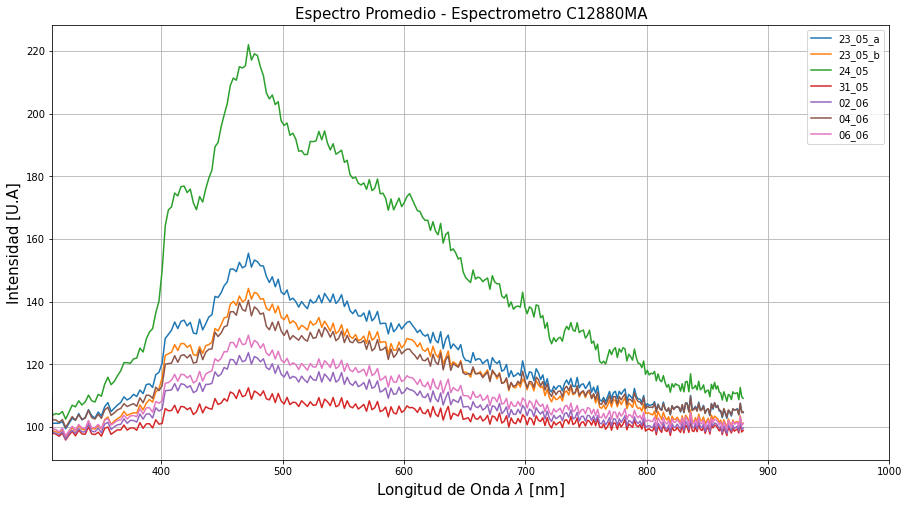

In [299]:
fig, ax1 = plt.subplots(figsize = (15, 8))

for i in range(len(esp)):
   plt.plot(wv, esp[i][:-1], label = names[i])
   plt.legend()
   plt.grid()

plt.xlim(310, 1000)
plt.title('Espectro Promedio - Espectrometro C12880MA', size = 15)
plt.xlabel('Longitud de Onda $\lambda$ [nm]', size = 15)
plt.ylabel('Intensidad [U.A]', size = 15)
plt.show()

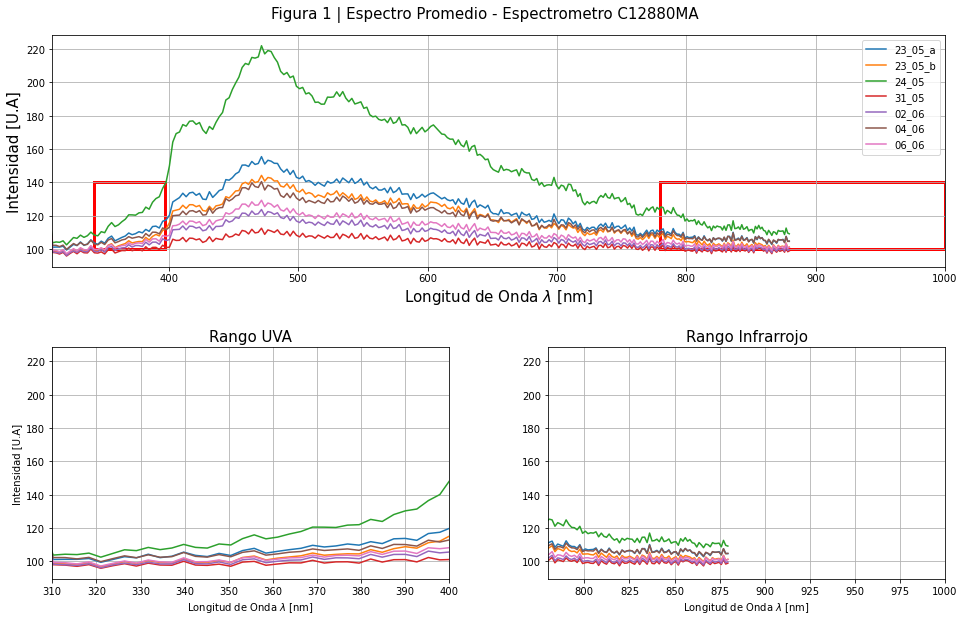

In [302]:
fig = plt.figure(figsize=(16, 10))

grid = plt.GridSpec(2, 2, wspace = .25, hspace = .35)

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

plt.subplot(grid[0, :])
for i in range(len(esp)):
   plt.plot(wv, esp[i][:-1], label = names[i])
   plt.legend()
   plt.grid()

plt.xlim(310, 1000)
plt.xlabel('Longitud de Onda $\lambda$ [nm]', size = 15)
plt.ylabel('Intensidad [U.A]', size = 15)

rectangle_UV = plt.Rectangle((342, 100), 55, 40, linewidth=3, edgecolor='r', facecolor='none')
rectangle_IR = plt.Rectangle((780, 100), 220, 40, linewidth=3, edgecolor='r', facecolor='none')

plt.gca().add_patch(rectangle_UV)
plt.gca().add_patch(rectangle_IR)

#AMPLIACION RANGO UVA

plt.subplot(grid[1, 0])
for i in range(len(esp)):
   plt.plot(wv, esp[i][:-1])
   plt.grid()

plt.xlim(310, 400)
plt.title('Rango UVA', size = 15)
plt.xlabel('Longitud de Onda $\lambda$ [nm]', size = 10)
plt.ylabel('Intensidad [U.A]', size = 10)

#AMPLIACION RANGO INFRARROJO

plt.subplot(grid[1, 1])
for i in range(len(esp)):
   plt.plot(wv, esp[i][:-1])
   plt.grid()

plt.xlim(780, 1000)
plt.title('Rango Infrarrojo', size = 15)
plt.xlabel('Longitud de Onda $\lambda$ [nm]', size = 10)

plt.suptitle('Figura 1 | Espectro Promedio - Espectrometro C12880MA', size = 15, y = 0.92)

plt.show()

[]

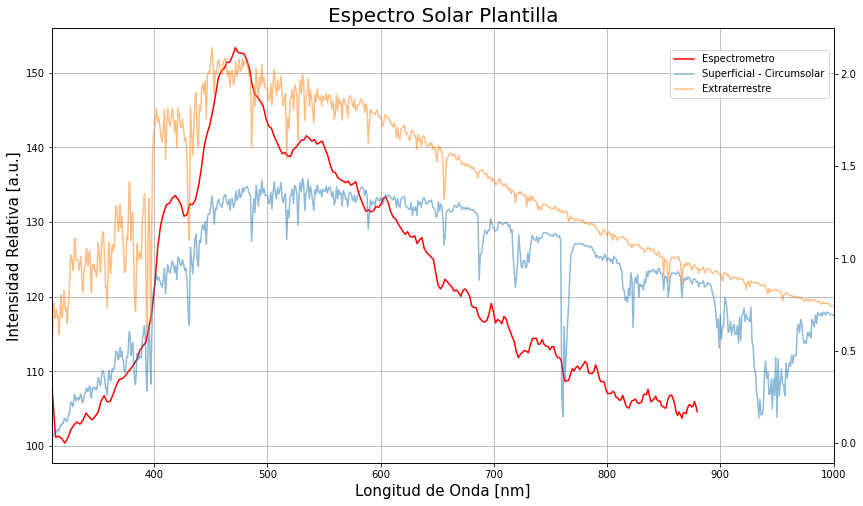

In [303]:
#Formato de Graficación de Espectros

fig, ax = plt.subplots(figsize = (14,8))

ax.plot(wv, lowpass(esp[0][0:-1]), 'r', label = 'Espectrometro')


ax2 = ax.twinx()
ax2.plot(solar_ref_sfc.wv, solar_ref_sfc.circumsolar, alpha = 0.5, label = 'Superficial - Circumsolar')
ax2.plot(solar_ref_sfc.wv, solar_ref_sfc.etr, alpha = 0.5, label = 'Extraterrestre')

ax.set_xlim(310, 1000)           #Rango de Respuesta Espectral del dispositivo
ax.set_xlabel('Longitud de Onda [nm]', size = 15), ax.set_ylabel('Intensidad Relativa [a.u.]', size = 15)
ax.set_title('Espectro Solar Plantilla', size = 20)


ax.grid()
fig.legend(loc = 'upper right', bbox_to_anchor = (0.9,0.85))


plt.plot()

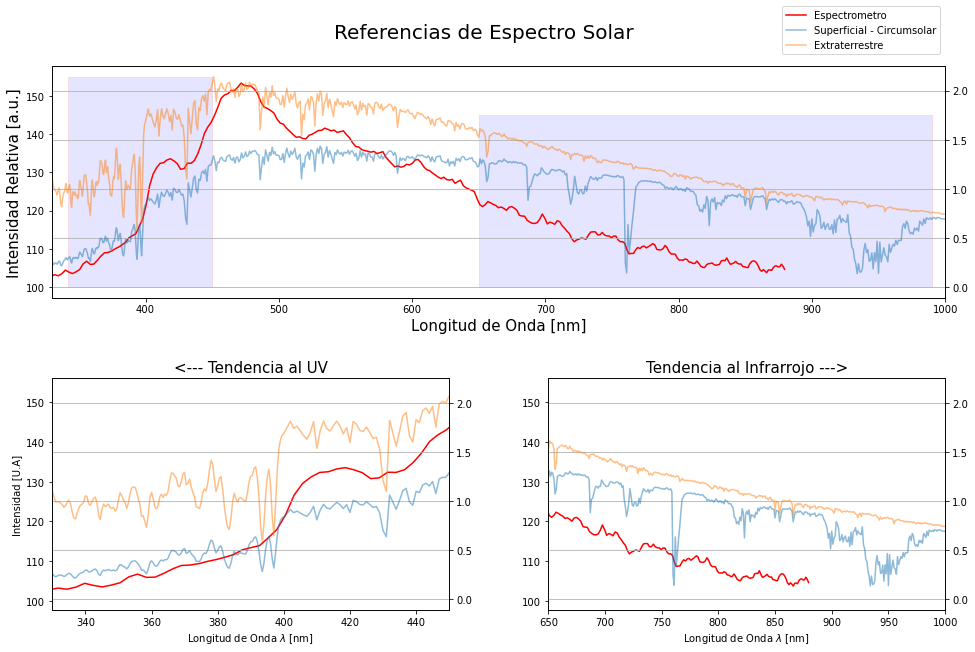

In [304]:
fig = plt.figure(figsize=(16, 10))

grid = plt.GridSpec(2, 2, wspace = .25, hspace = .35)

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

plt.subplot(grid[0, :])

plt.plot(wv, lowpass(esp[0][0:-1]), 'r', label = 'Espectrometro')  #Espectro con Filtro paso bajo aplicado

plt.ylabel('Intensidad Relativa [a.u.]', size = 15)
plt.xlabel('Longitud de Onda [nm]', size = 15)


rectangle_UV = plt.Rectangle((342, 100), 108, 55, linewidth=1, edgecolor='r', facecolor='b', alpha = 0.1)
rectangle_IR = plt.Rectangle((650, 100), 340, 45, linewidth=1, edgecolor='r', facecolor='b', alpha = 0.1)

plt.gca().add_patch(rectangle_UV)
plt.gca().add_patch(rectangle_IR)


plt.twinx()
plt.plot(solar_ref_sfc.wv, solar_ref_sfc.circumsolar, alpha = 0.5, label = 'Superficial - Circumsolar')
plt.plot(solar_ref_sfc.wv, solar_ref_sfc.etr, alpha = 0.5, label = 'Extraterrestre')

plt.xlim(330, 1000)          #Rango de Respuesta Espectral del dispositivo

plt.grid()


#AMPLIACION RANGO UVA

plt.subplot(grid[1, 0])

plt.plot(wv, lowpass(esp[0][0:-1]), 'r')
plt.xlim(330, 450)

plt.xlabel('Longitud de Onda $\lambda$ [nm]', size = 10)
plt.ylabel('Intensidad [U.A]')
plt.title('<--- Tendencia al UV', size = 15)

plt.twinx()
plt.plot(solar_ref_sfc.wv, solar_ref_sfc.circumsolar, alpha = 0.5)
plt.plot(solar_ref_sfc.wv, solar_ref_sfc.etr, alpha = 0.5)

plt.grid()


#AMPLIACION RANGO INFRARROJO

plt.subplot(grid[1, 1])

plt.plot(wv, lowpass(esp[0][0:-1]), 'r')

plt.xlim(650, 1000)
plt.xlabel('Longitud de Onda $\lambda$ [nm]', size = 10)


plt.twinx()
plt.plot(solar_ref_sfc.wv, solar_ref_sfc.circumsolar, alpha = 0.5)
plt.plot(solar_ref_sfc.wv, solar_ref_sfc.etr, alpha = 0.5)

plt.title('Tendencia al Infrarrojo --->', size = 15)


plt.grid()

plt.suptitle('Referencias de Espectro Solar', size = 20, y = 0.94)

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.97))

plt.show()

**Distribución del Vapor de agua en la Tropósfera terrestre**

![Water Vapour Distribution with Altitude](https://www.researchgate.net/profile/Yazeed-Alsarhan/publication/304158315/figure/fig4/AS:375167562862592@1466458325115/Air-pressure-water-vapour-concentration-and-temperature-variation-at-different-altitudes_W640.jpg)

**Figura #**<sup>[5]</sup>  *Presión del aire, concentración de vapor de agua y variación de temperatura a diferentes altitudes.*

De acuerdo a la **Figura #<sup>[5]</sup>** (Yazeed Alsarhan, 2015) se toman como parámetros para modelar la función de absorbción del vapor de agua en la atmósfera, donde la mayor concentración se encuentra en las capas mas bajas de la tropósfera y se selecciona la temperatura y presión atmosféricas por defecto T = 298 [K] y P = 1.0 [atm], segun se especifica la plataforma de simulación de espectroscopia de gases atmósfericos<sup>[6]</sup>

(650.0, 850.0)

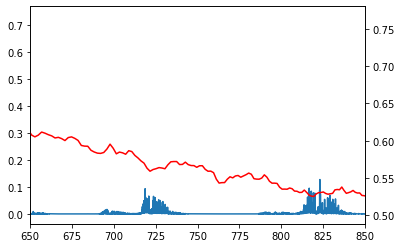

In [306]:
H2O_abs = np.loadtxt("data\SpectrMol_1fd77b5e6fae1c38b4a2017c83065367b877e485.absorp.txt")

H2O_abs_wv, H2O_abs_int = 1e7/H2O_abs[:,0], H2O_abs[:,1]

plt.plot(H2O_abs_wv, H2O_abs_int)
plt.twinx()
plt.plot(wv, lowpass(esp[0][0:-1])/200, 'r')
plt.xlim(650, 850)

**REFERNCES**

[1] https://www.nrel.gov/grid/solar-resource/spectra-am1.5.html

[2] https://www.astm.org/g0173-03r20.html

Ventusky nubosidad historico

[3] Song, Z., Wang, M., & Yang, H. (2022). Quantification of the Impact of Fine Particulate Matter on Solar Energy Resources and Energy Performance of Different Photovoltaic Technologies. In ACS Environmental Au (Vol. 2, Issue 3, pp. 275–286). American Chemical Society (ACS). https://doi.org/10.1021/acsenvironau.1c00048

[4] Estimation of Daily Ground-Received Global Solar Radiation Using Air Pollutant Data

Zhang, X., Zhang, M., Cui, Y., & He, Y. (2022). Estimation of Daily Ground-Received Global Solar Radiation Using Air Pollutant Data. In Frontiers in Public Health (Vol. 10). Frontiers Media SA. https://doi.org/10.3389/fpubh.2022.860107

[5] Yazeed Alsarhan. (2015). Terrestrial Millimetre Line-of-Sight Link Design at 45 GHz. Unpublished. https://doi.org/10.13140/RG.2.1.4707.8001

[6] Spectroscopy of Atmospheric Gases. (n.d.). https://spectra.tsu.ru/molecules/